In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [2]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [3]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
from urllib.request import urlretrieve
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv'
filename = "encoded_car_data.csv"
 
path, headers = urlretrieve(url, filename)

data = pd.read_csv(path)
data.head(5)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

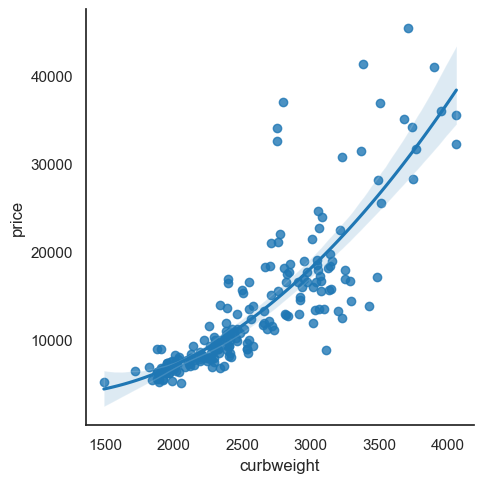

In [10]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order=2)

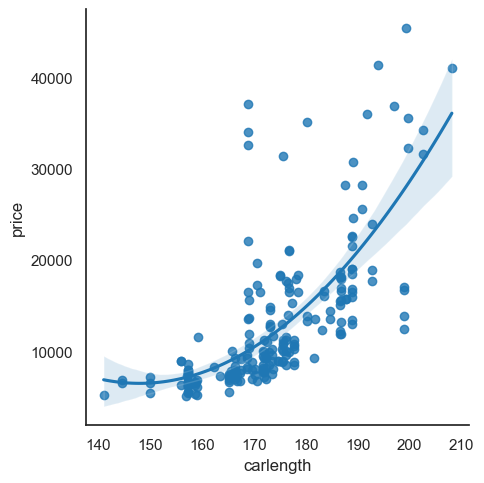

In [11]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order=2)

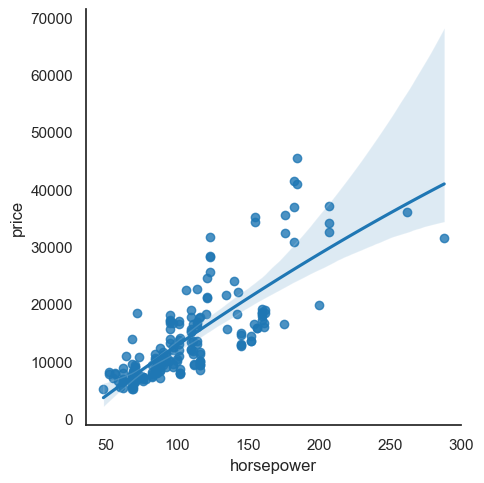

In [12]:
sns.lmplot(x = 'horsepower', y = 'price', data = data, order=2)

In [13]:
X = data.drop('price', axis=1)
y = data.price

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])

Number of test samples: 62
Number of training samples: 143


In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
predicted = lm.predict(X_test)

In [18]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.926097848057853
R^2 on testing data  0.8472544284949324


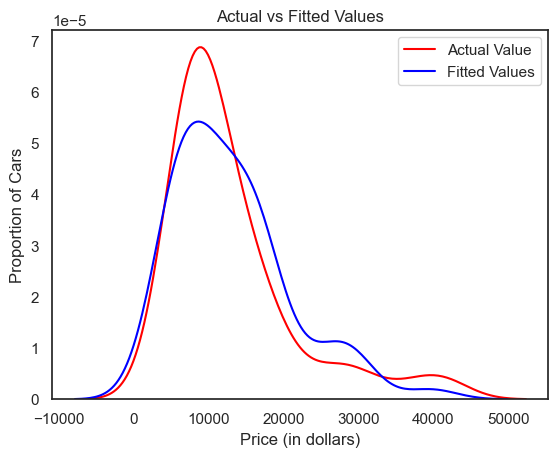

In [19]:
plot_dis(y_test,predicted)

In [20]:
{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': 1187555889701345.8,
 'gas': 1187555889700054.2,
 'std': 357.6245451661448,
 'turbo': -331.32281556489806,
 'convertible': 1783.1021722067708,
 'hardtop': 3131.9024802106273,
 'hatchback': -1798.666480507637,
 'sedan': -654.8646496475923,
 'wagon': -2456.0122590379883,
 '4wd': -610.6793102014719,
 'fwd': -309.99283467973027,
 'rwd': 919.5896739757657,
 'dohc': 2521.0350242977697,
 'dohcv': -13198.588509704678,
 'l': 2086.062388088141,
 'ohc': 4654.188135575838,
 'ohcf': 6076.036836506255,
 'ohcv': -2840.7045285586564,
 'rotor': 701.9923235132628,
 'eight': 9194.440961995042,
 'five': -2657.1967780204377,
 'four': -5246.1711821635035,
 'six': -2146.6553242591804,
 'three': 0.0048828125,
 'twelve': 153.71195470504932,
 'two': 702.0391985132628,
 'wheelbase': 106.18303400594768,
 'curbweight': 4.7656534240052,
 'enginesize': 23.328236581629035,
 'boreratio': -1812.8929569808033,
 'horsepower': 68.59173190117559,
 'carlength': -63.96900317856193,
 'carwidth': 578.7781156810831,
 

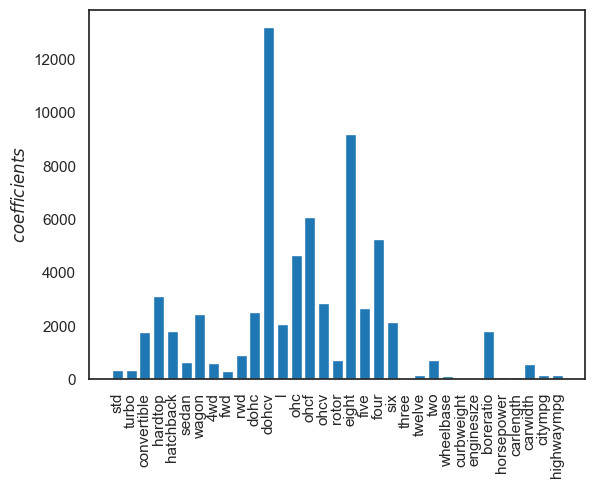

In [21]:
plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

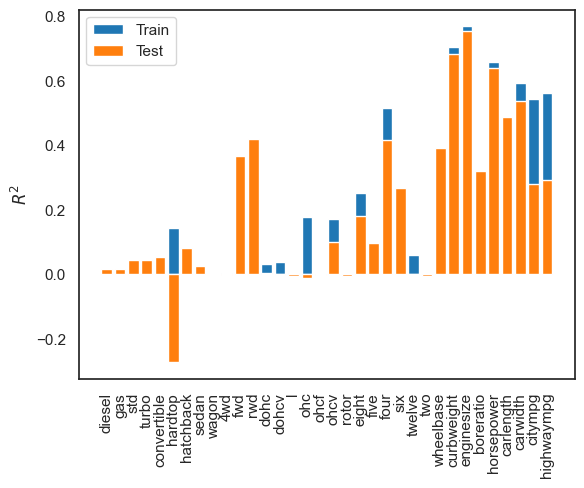

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.1824149303513927 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [22]:
get_R2_features(lm)

R^2 on training  data  0.9262623523796334
R^2 on testing data  -1.2794685140981763e+20


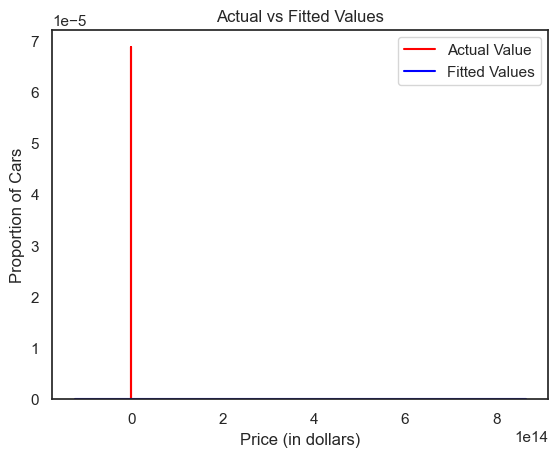

In [23]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)

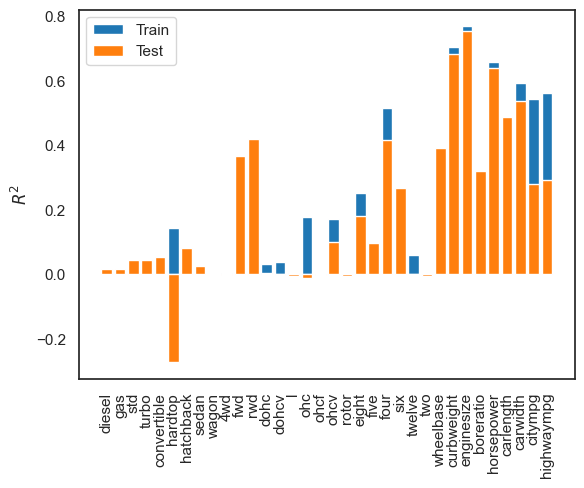

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.18241493035139264 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [24]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
get_R2_features(pipe)

In [25]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [27]:
print(X_train_poly.shape)

(143, 665)


In [28]:
print(X_test_poly.shape)

(62, 665)


In [29]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
predicted = lm.predict(X_train_poly)

In [31]:
print("R^2 on training data:", lm.score(X_train_poly, y_train))
print("R^2 on testing data:", lm.score(X_test_poly,y_test))

R^2 on training data: 0.9985318497975854
R^2 on testing data: -36729.95795012944


In [32]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]

In [33]:
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9985318497975854
R^2 on testing data: -36729.95795012944


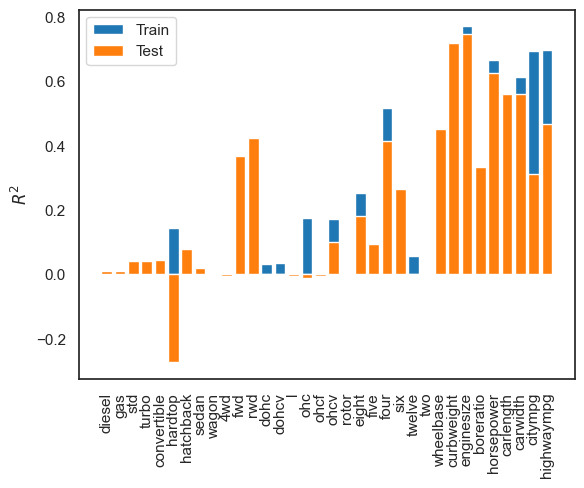

Training R^2 mean value 0.23056118064408396 Testing R^2 mean value 0.19307016811654565 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [35]:
get_R2_features(pipe)

In [36]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)

In [37]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
 
    
}

In [38]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [39]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [40]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [41]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [42]:
best.score(X_test,y_test)

0.9625701280505028

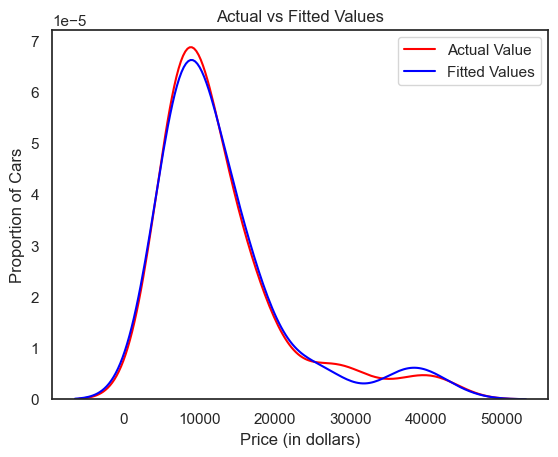

In [43]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

diesel
gas
std
turbo
convertible
hardtop
hatchback
sedan
wagon
4wd
fwd
rwd
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
wheelbase
curbweight
enginesize
boreratio
horsepower
carlength
carwidth
citympg
highwaympg


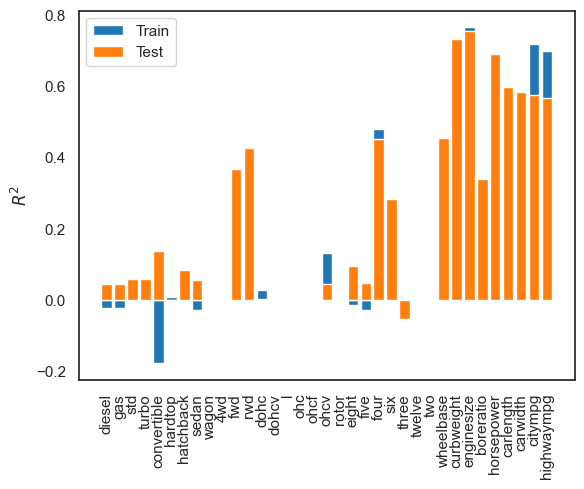

Training R^2 mean value 0.17730822638589278 Testing R^2 mean value 0.21279948133214072 
Training R^2 max value 0.765323637379124 Testing R^2 max value 0.7565151400968062 


In [44]:
features=list(X)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(X_test[[feature]],y_test))
    R_2_train.append(best.score(X_train[[feature]],y_train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )